### Bidiretional LSTM for Time Series Forecasting

Libs required:

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.optimizers import Adam
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dense, LSTM, Bidirectional

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,4)

Using TensorFlow backend.


In [2]:
et0_train = pd.read_csv('./data/label_train.csv')
et0_val = pd.read_csv('./data/label_val.csv')

et0_train_ = pd.read_csv('./data/label_train_.csv')
et0_test = pd.read_csv('./data/label_test.csv')

In [3]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [4]:
def overfitting_plot(history):
    loss = history.history['loss']
    
    epochs = range(1, len(loss) + 1)
    
    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.title('Training loss')
    plt.legend(loc='best')

In [5]:
n_steps = 1
n_features = 1

features, label = split_sequence(et0_train_.values, n_steps)
features = features.reshape((features.shape[0], features.shape[1], n_features))

In [6]:
for i in range(0,5):
    print("{}, {}\n".format(features[i], label[i]))

[[6.95434295]], [9.08150375]

[[9.08150375]], [9.0281699]

[[9.0281699]], [7.93418562]

[[7.93418562]], [7.70423053]

[[7.70423053]], [5.19487979]



In [7]:
model = Sequential()
model.add(Bidirectional(LSTM(256,
                             return_sequences=True,
                        input_shape=(n_steps, n_features))))

model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Bidirectional(LSTM(256)))
model.add(Dense(1))

In [8]:
model.compile(optimizer=Adam(lr=1e-3), 
              loss='mean_absolute_error', 
              metrics=['mae', 'mse'], )

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
history = model.fit(features,
                    label,
                    epochs=10, 
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
921/921 [==============================] - 10s 11ms/step - loss: 3.3314 - mean_absolute_error: 3.3314 - mean_squared_error: 17.8482
Epoch 2/10
921/921 [==============================] - 3s 3ms/step - loss: 1.5818 - mean_absolute_error: 1.5818 - mean_squared_error: 3.9226
Epoch 3/10
921/921 [==============================] - 3s 3ms/step - loss: 1.3908 - mean_absolute_error: 1.3908 - mean_squared_error: 3.1752
Epoch 4/10
921/921 [==============================] - 2s 3ms/step - loss: 1.3814 - mean_absolute_error: 1.3814 - mean_squared_error: 3.1002
Epoch 5/10
921/921 [==============================] - 3s 3ms/step - loss: 1.3951 - mean_absolute_error: 1.3951 - mean_squared_error: 3.1487
Epoch 6/10
921/921 [==============================] - 3s 3ms/step - loss: 1.4031 - mean_absolute_error: 1.4031 - mean_squared_error: 3.2310
Epoch 7/10
921/921 [==============================] - 3s 3ms/step - loss: 1.3712 - mean_absolute_error: 1.371

In [10]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error'])

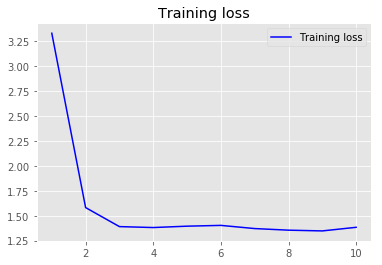

In [11]:
overfitting_plot(history)

In [13]:
features_test, label_test = split_sequence(et0_test.values, n_steps)
features_test = features_test.reshape((features_test.shape[0], features_test.shape[1], n_features))

In [14]:
model.evaluate(features_test, label_test)

230/230 [==============================] - 1s 5ms/step


[1.3471294983573583, 1.3471294983573583, 3.036163914721945]

In [15]:
np.sqrt(3.036163914721945)

1.7424591572607793